In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

In [2]:
drive.mount('/content/drive', force_remount=False)

Mounted at /content/drive


In [3]:
train_path = '/content/drive/MyDrive/Py Project/FineTune-BERT-FULL/train.txt'
test_path = '/content/drive/MyDrive/Py Project/FineTune-BERT-FULL/test.txt'
val_path = '/content/drive/MyDrive/Py Project/FineTune-BERT-FULL/val.txt'

In [84]:
train_data = pd.read_csv(train_path, header=None, sep=';', names=['Input', 'Sentiment'], encoding='utf-8')
test_data = pd.read_csv(test_path, header=None, sep=';', names=['Input', 'Sentiment'], encoding='utf-8')
val_data = pd.read_csv(val_path, header=None, sep=';', names=['Input', 'Sentiment'], encoding='utf-8')

In [85]:
df = pd.concat([train_data, test_data, val_data], axis=0)
df = df.reset_index()
df

,index,Input,Sentiment
0,0,i didnt feel humiliated,sadness
1,1,i can go from feeling so hopeless to so damned...,sadness
2,2,im grabbing a minute to post i feel greedy wrong,anger
3,3,i am ever feeling nostalgic about the fireplac...,love
4,4,i am feeling grouchy,anger
...,...,...,...
19995,1995,im having ssa examination tomorrow in the morn...,sadness
19996,1996,i constantly worry about their fight against n...,joy
19997,1997,i feel its important to share this info for th...,joy
19998,1998,i truly feel that if you are passionate enough...,joy


In [6]:
!wget https://raw.githubusercontent.com/yogawicaksana/helper_prabowo/main/helper_prabowo_ml.py

--2022-07-07 11:08:35--  https://raw.githubusercontent.com/yogawicaksana/helper_prabowo/main/helper_prabowo_ml.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13881 (14K) [text/plain]
Saving to: ‘helper_prabowo_ml.py’

helper_prabowo_ml.p 100%[===================>]  13.56K  --.-KB/s    in 0s      

2022-07-07 11:08:35 (38.7 MB/s) - ‘helper_prabowo_ml.py’ saved [13881/13881]



In [86]:
from helper_prabowo_ml import clean_html, remove_links, non_ascii, lower, email_address, removeStopWords, punct, remove_
import re

In [87]:
def preproc(df, colname):
  df[colname] = df[colname].apply(func=clean_html)
  df[colname] = df[colname].apply(func=remove_links)
  df[colname] = df[colname].apply(func=non_ascii)
  df[colname] = df[colname].apply(func=lower)
  df[colname] = df[colname].apply(func=email_address)
  # df[colname] = df[colname].apply(func=removeStopWords)
  df[colname] = df[colname].apply(func=punct)
  df[colname] = df[colname].apply(func=remove_)
  return(df)

In [88]:
df_clean = preproc(df, 'Input')
df_clean.drop('index', axis=1, inplace=True)
df_clean['num_words'] = df_clean['Input'].apply(lambda x: len(x.split()))
df_clean

,Input,Sentiment,num_words
0,didnt feel humiliated,sadness,3
1,can go from feeling so hopeless to so damned h...,sadness,20
2,m grabbing a minute to post i feel greedy wrong,anger,10
3,am ever feeling nostalgic about the fireplace ...,love,17
4,am feeling grouchy,anger,3
...,...,...,...
19995,m having ssa examination tomorrow in the morni...,sadness,34
19996,constantly worry about their fight against nat...,joy,28
19997,feel its important to share this info for thos...,joy,14
19998,truly feel that if you are passionate enough a...,joy,18


In [92]:
df_clean['num_words'].max()

65

In [89]:
df_clean['Sentiment'] = df_clean['Sentiment'].astype('category')
df_clean['Sentiment'].value_counts()

joy         6761
sadness     5797
anger       2709
fear        2373
love        1641
surprise     719
Name: Sentiment, dtype: int64

In [90]:
df_clean['Sentiment']

0        sadness
1        sadness
2          anger
3           love
4          anger
          ...   
19995    sadness
19996        joy
19997        joy
19998        joy
19999        joy
Name: Sentiment, Length: 20000, dtype: category
Categories (6, object): ['anger', 'fear', 'joy', 'love', 'sadness', 'surprise']

In [91]:
df_clean['Sentiment'].cat.codes

0        4
1        4
2        0
3        3
4        0
        ..
19995    4
19996    2
19997    2
19998    2
19999    2
Length: 20000, dtype: int8

In [93]:
df_clean['Sentiment'] = df_clean['Sentiment'].cat.codes

In [94]:
encoded_dict = {'anger':0, 'fear':1, 'joy':2, 'love':3, 'sadness':4, 'surprise':5} 

In [95]:
df_clean.sample(5)

,Input,Sentiment,num_words
6867,went to bed late last night and feel sort of g...,4,13
16678,feel like i have all these cute things but i d...,2,23
12694,feel lost as in what the fuck am i doing,4,10
16227,feel like i cant be respected if i have self r...,2,21
1282,feel surprised because i didnt expect it,5,7


# tts

In [96]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df_clean, test_size=0.3, random_state=42,
                                     stratify=df_clean['Sentiment'])

df_train.shape, df_test.shape

((14000, 3), (6000, 3))

# ohe

In [97]:
from tensorflow.keras.utils import to_categorical
to_categorical(df_train['Sentiment'])

array([[0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       ...,
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)

In [98]:
pd.get_dummies(df_train['Sentiment'])

,0,1,2,3,4,5
7181,0,0,1,0,0,0
9479,0,1,0,0,0,0
18812,0,0,0,0,1,0
8670,0,0,0,0,1,0
17014,0,0,0,0,1,0
...,...,...,...,...,...,...
5829,0,0,1,0,0,0
14315,0,0,0,0,1,0
7423,1,0,0,0,0,0
7721,0,0,0,0,1,0


# model

In [19]:
! pip install transformers
from transformers import AutoTokenizer, TFBertModel 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.4 MB 6.8 MB/s 
     |████████████████████████████████| 6.6 MB 65.4 MB/s 
     |████████████████████████████████| 101 kB 14.7 MB/s 
     |████████████████████████████████| 596 kB 65.3 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [20]:
tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')
bert = TFBertModel.from_pretrained('bert-base-cased')

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/426k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/502M [00:00<?, ?B/s]

Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [21]:
tokenizer("hello, i am from indonesia")

{'input_ids': [101, 19082, 117, 178, 1821, 1121, 1107, 3842, 18766, 1161, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [99]:
max_len = 70

X_train = tokenizer(
    text=df_train['Input'].tolist(),
    add_special_tokens=True,
    max_length=max_len,
    truncation=True,
    padding=True,
    return_tensors='tf',
    return_token_type_ids=False,
    return_attention_mask=True,
    verbose=True
)

X_test = tokenizer(
    text=df_test['Input'].tolist(),
    add_special_tokens=True,
    max_length=max_len,
    truncation=True,
    padding=True,
    return_tensors='tf',
    return_token_type_ids=False,
    return_attention_mask=True,
    verbose=True
)

In [100]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import TruncatedNormal
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Dense

In [101]:
input_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_ids")
input_mask = Input(shape=(max_len,), dtype=tf.int32, name="attention_mask")
# embeddings = dbert_model(input_ids, attention_mask = input_mask)[0]

embeddings = bert(input_ids, attention_mask = input_mask)[0] # 0 = last hidden state, 1 = poller_output
out = tf.keras.layers.GlobalMaxPool1D()(embeddings)
out = Dense(128, activation='relu')(out)
out = tf.keras.layers.Dropout(0.1)(out)
out = Dense(32, activation='relu')(out)

y = Dense(6, activation='softmax')(out)

model = tf.keras.Model(inputs=[input_ids, input_mask], outputs=y)
model.layers[2].trainable = True

In [102]:
model.layers

In [103]:
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 70)]         0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 70)]         0           []                               
                                                                                                  
 tf_bert_model (TFBertModel)    multiple             108310272   ['input_ids[0][0]',              
                                                                  'attention_mask[0][0]']         
                                                                                                  
 global_max_pooling1d_5 (Global  (None, 768)         0           ['tf_bert_model[5][0]']    

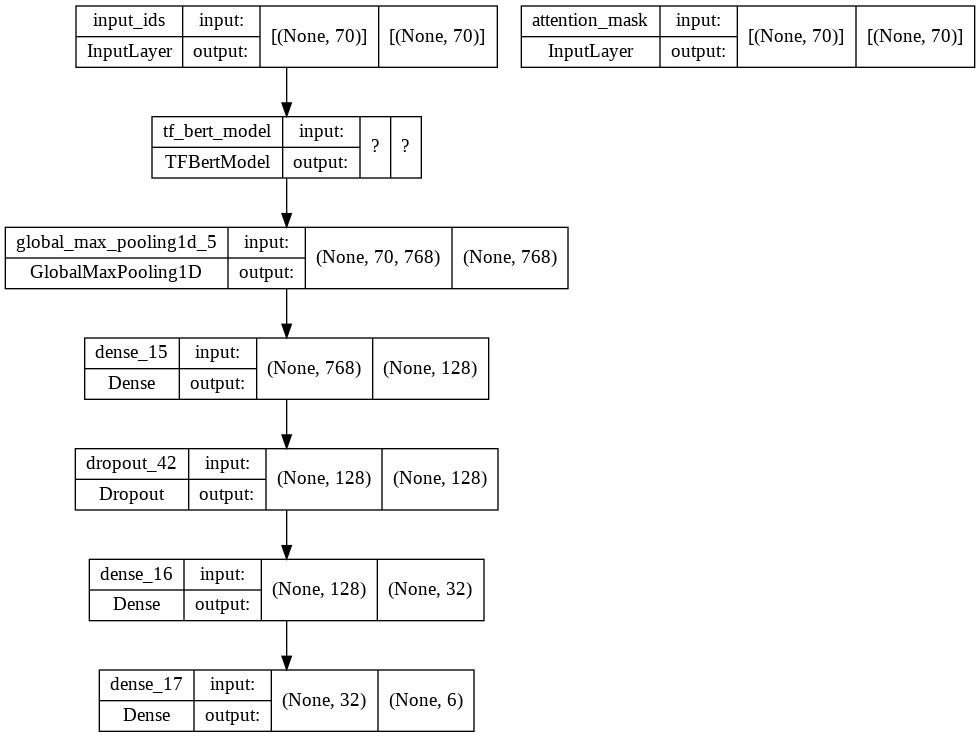

In [104]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [120]:
optimizer = Adam(
    learning_rate=5e-05, # HF recommendation
    epsilon=1e-08,
    decay=0.01,
    clipnorm=1.0
)

loss = CategoricalCrossentropy(from_logits=True)
metric = CategoricalAccuracy('balanced_accuracy')

model.compile(
    optimizer=optimizer,
    loss=loss,
    metrics=metric
)

In [121]:
history = model.fit(
    x = {'input_ids':X_train['input_ids'], 'attention_mask':X_train['attention_mask']},
    y = to_categorical(df_train['Sentiment']),
    validation_data = ({'input_ids':X_test['input_ids'], 'attention_mask':X_test['attention_mask']},
                        to_categorical(df_test['Sentiment'])),
    epochs=1,
    batch_size=32
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


438/438 [==============================] - 265s 559ms/step - loss: 0.0814 - balanced_accuracy: 0.9643 - val_loss: 0.1808 - val_balanced_accuracy: 0.9408


# Predict

In [122]:
predicted = model.predict({'input_ids': X_test['input_ids'], 'attention_mask': X_test['attention_mask']})

In [123]:
predicted[0]

array([9.9957067e-01, 2.1637483e-05, 3.1958235e-04, 5.6543638e-05,
       3.0707757e-05, 7.1548646e-07], dtype=float32)

In [124]:
y_predicted = np.argmax(predicted, axis=1)

In [125]:
from sklearn.metrics import classification_report

In [126]:
print(classification_report(df_test['Sentiment'], y_predicted))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       813
           1       0.91      0.89      0.90       712
           2       0.96      0.96      0.96      2028
           3       0.87      0.85      0.86       492
           4       0.97      0.98      0.97      1739
           5       0.85      0.81      0.83       216

    accuracy                           0.94      6000
   macro avg       0.92      0.91      0.91      6000
weighted avg       0.94      0.94      0.94      6000



In [128]:
texts = input(str('input text here: '))

X_val = tokenizer(
    text=texts,
    add_special_tokens=True,
    max_length=70,
    truncation=True,
    padding='max_length',
    return_tensors='tf',
    return_token_type_ids=False,
    return_attention_mask=True,
    verbose=True
)
validation=model.predict({'input_ids':X_val['input_ids'], 'attention_mask':X_val['attention_mask']})*100
validation

input text here: i am not so happy with this laptop


array([[1.68717783e-02, 3.23268569e-06, 9.99596024e+01, 1.10925585e-02,
        8.91383551e-03, 3.50898178e-03]], dtype=float32)

In [129]:
for key, value in zip(encoded_dict.keys(), validation[0]):
  print(key, value)

anger 0.016871778
fear 3.2326857e-06
joy 99.9596
love 0.0110925585
sadness 0.0089138355
surprise 0.0035089818
